In [0]:
#import natural language toolkit
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download_shell()
 

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d)
Command 'd)' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt


      Unzipping tokenizers/punkt.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> vader_lexicon
Command 'vader_lexicon' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> vader_lexicon



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [0]:
# pandas and matplotlib setup
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 16})
import seaborn as sns

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

In [0]:
dataframe = pd.read_csv('employee_reviews.csv')

In [0]:
dataframe.shape

(67529, 17)

In [0]:
dataframe.isnull().sum()

# fill NAs with string 'No response'
dataframe['summary'].fillna('No response', inplace=True)
dataframe['advice-to-mgmt'].fillna('No response', inplace=True)

dataframe.isnull().sum()

Unnamed: 0                    0
company                       0
location                      0
dates                         0
job-title                     0
summary                       0
pros                          0
cons                          0
advice-to-mgmt                0
overall-ratings               0
work-balance-stars            0
culture-values-stars          0
carrer-opportunities-stars    0
comp-benefit-stars            0
senior-mangemnet-stars        0
helpful-count                 0
link                          0
dtype: int64

The number of average and bad reviews is 21841
This means 32.34314146514831 percent of employees left a subpar review


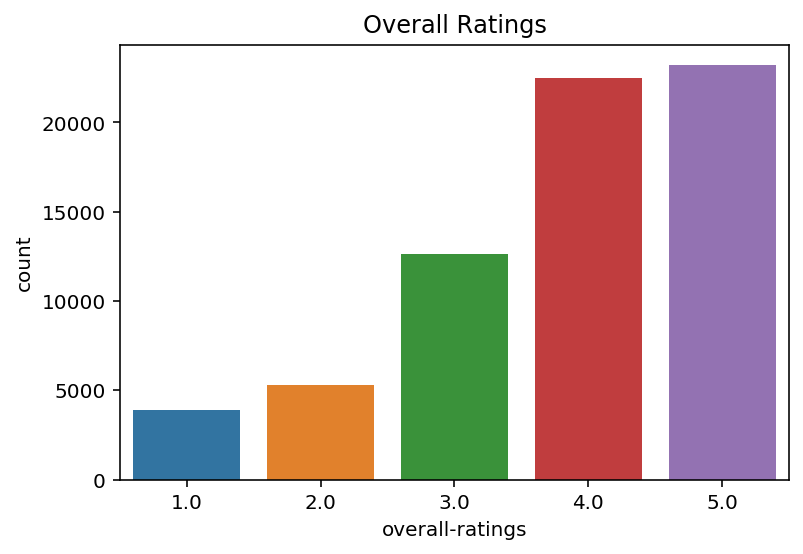

In [0]:
sns.countplot(dataframe['overall-ratings'])
plt.title('Overall Ratings')
subpar_ratings = (dataframe['overall-ratings'] == 3).sum()
subpar_ratings += (dataframe['overall-ratings'] == 2).sum()
subpar_ratings += (dataframe['overall-ratings'] == 1).sum()
bad_percentage = (subpar_ratings / dataframe.shape[0]) * 100
subpar_ratings = str(subpar_ratings)
print("The number of average and bad reviews is " + subpar_ratings)
bad_percentage = str(bad_percentage)
print("This means " + bad_percentage + " percent of employees left a subpar review")

In [0]:
#Will check the frequency of a word in pros column. Need it to be lowercase

def check_word_freq(word):
    total_responses = dataframe.shape[0]
    print(total_responses)
    pros = dataframe['pros'].str.lower().str.contains(word).sum()/total_responses
    cons = dataframe['cons'].str.lower().str.contains(word).sum()/total_responses
    
    out = pd.DataFrame({'Listed In Pros': [pros], 'Listed in Cons': [cons]})
    return out

In [0]:
check_word_freq('balance')

67529


,Listed In Pros,Listed in Cons
0,0.055991,0.08423


In [0]:
check_word_freq('hours')

67529


,Listed In Pros,Listed in Cons
0,0.039805,0.092553


In [0]:
check_word_freq('people')

67529


,Listed In Pros,Listed in Cons
0,0.24354,0.115017


In [0]:
check_word_freq('management')

67529


,Listed In Pros,Listed in Cons
0,0.047269,0.131158


In [0]:
check_word_freq('younger')

67529


,Listed In Pros,Listed in Cons
0,0.000518,0.001185


In [0]:
## import word tokenizer
from nltk.tokenize import word_tokenize

In [0]:
#tokenize the data in cons column
dataframe['cons_token'] = dataframe['cons'].apply(word_tokenize)
dataframe['pros_token'] = dataframe['pros'].apply(word_tokenize)
dataframe.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,cons_token,pros_token
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...,"[Bureaucracy, is, slowing, things, down]","[People, are, smart, and, friendly]"
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...,"[1, ), Work/life, balance, ., What, balance, ?...","[1, ), Food, ,, food, ,, food, ., 15+, cafes, ..."
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...,"[*, It, *is*, becoming, larger, ,, and, with, ...","[*, If, you, 're, a, software, engineer, ,, yo..."
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...,"[I, live, in, SF, so, the, commute, can, take,...","[You, ca, n't, find, a, more, well-regarded, c..."
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...,"[If, you, do, n't, work, in, MTV, (, HQ, ), ,,...","[Google, is, a, world, of, its, own, ., At, ev..."


In [0]:
#Remove stopwords to reduce computation
nltk.download_shell()
stop_words = set(stopwords.words("english"))

print(stop_words)
#stopwords_updated.update(['good', 'Good', 'great'])



NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q
{"you'll", 'the', 'both', 'where', 'between', "should've", "needn't", 'yourselves', 'to', 'but', 'over', 'those', 'if', 'will', 'on', 't', 'should', 'ourselves', 'myself', 'himself', 'then', "you've", 'against', 'whom', 'again', "mustn't", 'and', 'few', 'does', "she's", 'very', "weren't", "haven't", 'for', 'couldn', 'in', 'being', 'through', 'with', 'them', 'haven', "you're", 've', 'a', 'most', 'each', 'doesn', 'nor', 'me', 'you', 're', "you'd", 'had', 'its', 'be', 'hers', 'their', 'i', 'theirs', 'all', 'do', "don't", "shouldn't", 'ours', 'so', "aren't", 'didn', 'him', 'it', 'was', 'after', 'yours', "that'll", 'who', "didn't", 'can', 'up', 'below', 'o', "isn't", "hadn't", 'until', 'he', 'her', 's', 'under', 'mustn', 'as', 'too', 'shouldn', 'about', 'wh

In [0]:
dataframe['cons_stop'] = dataframe['cons_token'].apply(lambda x: [item for item in x if item not in stop_words])
dataframe['pros_stop'] = dataframe['pros_token'].apply(lambda x: [item for item in x if item not in stop_words])
dataframe.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,...,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,cons_token,pros_token,cons_stop,pros_stop
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,...,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...,"[Bureaucracy, is, slowing, things, down]","[People, are, smart, and, friendly]","[Bureaucracy, slowing, things]","[People, smart, friendly]"
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,...,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...,"[1, ), Work/life, balance, ., What, balance, ?...","[1, ), Food, ,, food, ,, food, ., 15+, cafes, ...","[1, ), Work/life, balance, ., What, balance, ?...","[1, ), Food, ,, food, ,, food, ., 15+, cafes, ..."
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,...,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...,"[*, It, *is*, becoming, larger, ,, and, with, ...","[*, If, you, 're, a, software, engineer, ,, yo...","[*, It, *is*, becoming, larger, ,, comes, grow...","[*, If, 're, software, engineer, ,, 're, among..."
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,...,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...,"[I, live, in, SF, so, the, commute, can, take,...","[You, ca, n't, find, a, more, well-regarded, c...","[I, live, SF, commute, take, 1.5, hours, 1.75,...","[You, ca, n't, find, well-regarded, company, a..."
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,...,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...,"[If, you, do, n't, work, in, MTV, (, HQ, ), ,,...","[Google, is, a, world, of, its, own, ., At, ev...","[If, n't, work, MTV, (, HQ, ), ,, given, work,...","[Google, world, ., At, every, company, ,, lots..."


In [0]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
dataframe['cons_stem'] = dataframe['cons_stop'].apply(lambda x: [ps.stem(y) for y in x])
dataframe['pros_stem'] = dataframe['pros_stop'].apply(lambda x: [ps.stem(y) for y in x])


In [0]:
dataframe.head(10)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,...,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,cons_token,pros_token,cons_stop,pros_stop,cons_stem,pros_stem
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,...,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...,"[Bureaucracy, is, slowing, things, down]","[People, are, smart, and, friendly]","[Bureaucracy, slowing, things]","[People, smart, friendly]","[bureaucraci, slow, thing]","[peopl, smart, friendli]"
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,...,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...,"[1, ), Work/life, balance, ., What, balance, ?...","[1, ), Food, ,, food, ,, food, ., 15+, cafes, ...","[1, ), Work/life, balance, ., What, balance, ?...","[1, ), Food, ,, food, ,, food, ., 15+, cafes, ...","[1, ), work/lif, balanc, ., what, balanc, ?, a...","[1, ), food, ,, food, ,, food, ., 15+, cafe, m..."
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,...,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...,"[*, It, *is*, becoming, larger, ,, and, with, ...","[*, If, you, 're, a, software, engineer, ,, yo...","[*, It, *is*, becoming, larger, ,, comes, grow...","[*, If, 're, software, engineer, ,, 're, among...","[*, It, *is*, becom, larger, ,, come, grow, pa...","[*, If, 're, softwar, engin, ,, 're, among, ki..."
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,...,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...,"[I, live, in, SF, so, the, commute, can, take,...","[You, ca, n't, find, a, more, well-regarded, c...","[I, live, SF, commute, take, 1.5, hours, 1.75,...","[You, ca, n't, find, well-regarded, company, a...","[I, live, SF, commut, take, 1.5, hour, 1.75, h...","[you, ca, n't, find, well-regard, compani, act..."
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,...,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...,"[If, you, do, n't, work, in, MTV, (, HQ, ), ,,...","[Google, is, a, world, of, its, own, ., At, ev...","[If, n't, work, MTV, (, HQ, ), ,, given, work,...","[Google, world, ., At, every, company, ,, lots...","[If, n't, work, mtv, (, HQ, ), ,, given, work,...","[googl, world, ., At, everi, compani, ,, lot, ..."
5,6,google,"Mountain View, CA","Dec 9, 2018",Former Employee - SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,none,5.0,...,5.0,4.0,1,https://www.glassdoor.com/Reviews/Google-Revie...,"[Food, is, not, good, as, I, expected, ., Peop...","[People, are, not, that, busy, ,, so, they, ar...","[Food, good, I, expected, ., People, said, get...","[People, busy, ,, nice, help, ., They, make, s...","[food, good, I, expect, ., peopl, said, get, w...","[peopl, busi, ,, nice, help, ., they, make, su..."
6,7,google,"New York, NY","Dec 11, 2018",Current Employee - Software Engineer,Software engineer,Great working e

In [0]:
# get series of all most and least liked words after stemming
stopwords_updated = set(stop_words)
stopwords_updated.update(['good', 'Good', 'great','Great','You', 'n\'t', '\'s', 'I', '\'\"'])
dataframe['cons_stop'] = dataframe['cons_token'].apply(lambda x: [item for item in x if item not in stopwords_updated])
dataframe['pros_stop'] = dataframe['pros_token'].apply(lambda x: [item for item in x if item not in stopwords_updated])
cons = dataframe['cons_stop'].apply(pd.Series).stack()
pros = dataframe['pros_stop'].apply(pd.Series).stack()

In [0]:
from nltk.probability import FreqDist
import string

# calculation word frequency
fdist_cons = FreqDist(cons)
fdist_pros = FreqDist(pros)

# remove punctuation counts
for punc in string.punctuation:
    del fdist_cons[punc]
    del fdist_pros[punc]

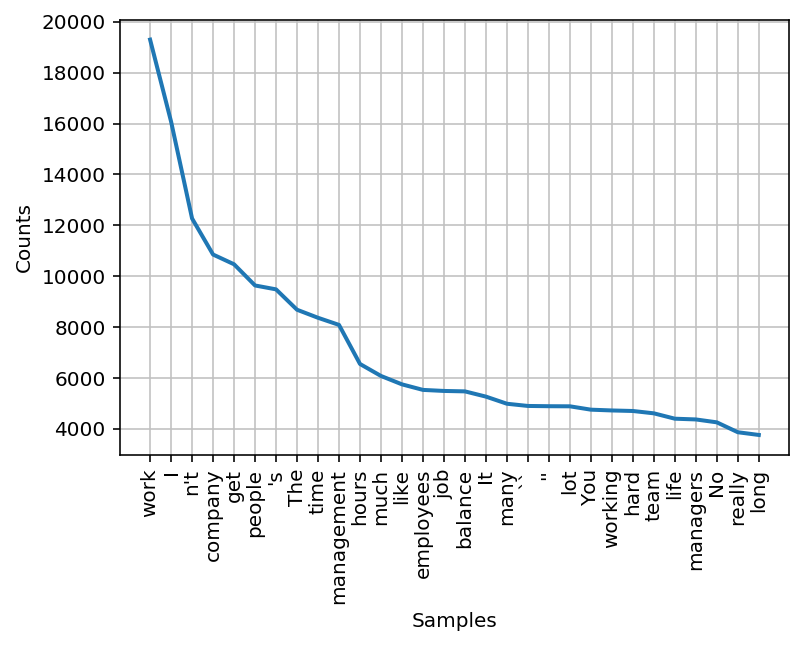

In [0]:
# Frequency Distribution Plot - top 20
fdist_cons.plot(30,cumulative=False)

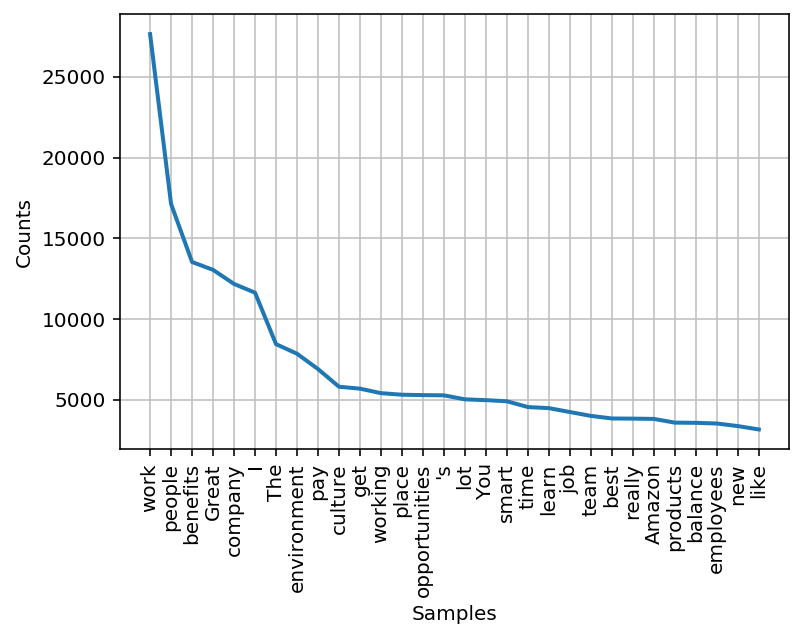

In [0]:
# Frequency Distribution Plot - top 20
fdist_pros.plot(30,cumulative=False)

In [0]:
# get list of the 'sentences' (responses) from each individual
cons_list = list(dataframe['cons'].values)
pros_list = list(dataframe['pros'].values)

# lowercase text
cons = list(map(str.lower, cons_list))
pros = list(map(str.lower, pros_list))

# remove punctuation
for c in string.punctuation:
    cons=str(cons).replace(c,"")
    pros=str(pros).replace(c,"")

# get list of two documents together
corpus = [str(cons),str(pros)]

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [0]:
# create vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=2000,
                        tokenizer=word_tokenize,
                        stop_words=stop_words)


In [0]:
# calculate TF-IDF
cogs_tfidf = pd.DataFrame(tfidf.fit_transform(corpus).toarray())
cogs_tfidf.columns = tfidf.get_feature_names()
cogs_tfidf.rename(index={0:'cons',1:'pros'}, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [0]:
most_unique = cogs_tfidf.idxmax(axis=1)
most_unique

cons    work
pros    work
dtype: object

In [0]:
cogs_tfidf.sort_values(by='pros', axis=1, ascending=False)


,work,great,good,people,benefits,company,pay,environment,working,culture,...,disorganized,throat,unorganized,bathroom,exhausting,tiring,crowded,unclear,nightmare,inconsistent
cons,0.037627,0.030992,0.032840,0.035171,0.028562,0.035454,0.031711,0.030816,0.032872,0.031690,...,0.020634,0.020173,0.020121,0.020067,0.021682,0.021476,0.020300,0.020588,0.019875,0.030814
pros,0.042211,0.041877,0.041091,0.040338,0.039921,0.039069,0.037389,0.037341,0.036529,0.036497,...,0.008898,0.008898,0.008898,0.008898,0.007825,0.007825,0.007825,0.003729,0.003729,0.000000


In [0]:
cogs_tfidf.sort_values(by='cons', axis=1, ascending=False)


,work,company,get,people,management,time,hours,much,like,employees,...,inclusive,cv,benifits,ample,amenities,fitness,energetic,respectful,independence,dental
cons,0.037627,0.035454,0.035210,0.035171,0.035131,0.034501,0.033763,0.033357,0.033265,0.033235,...,0.013341,0.012715,0.012479,0.012479,0.012479,0.011950,0.011950,0.011652,0.011652,0.011652
pros,0.042211,0.039069,0.036255,0.040338,0.033835,0.035333,0.033387,0.031180,0.033880,0.034492,...,0.021222,0.022966,0.022812,0.022234,0.022128,0.022128,0.022676,0.021991,0.021486,0.025907


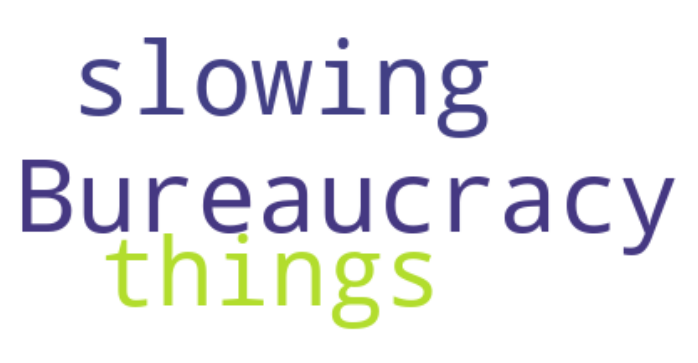

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = dataframe['cons'][0]
#stopwords_updated = set(stop_words)
#stopwords_updated.update(['good', 'Good', 'great'])
wordcloud = WordCloud(stopwords=stopwords_updated,background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

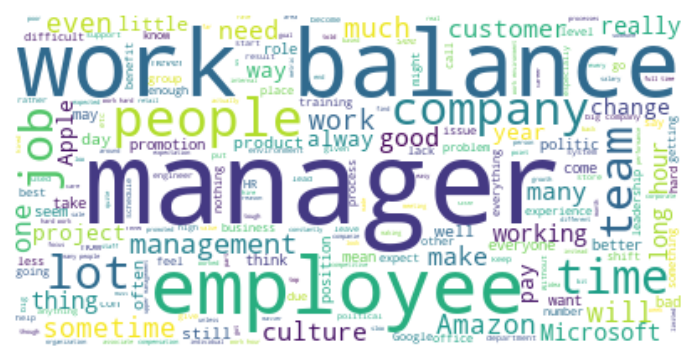

In [0]:
cons_text = " ".join(review for review in dataframe['cons'])
stopwords_updated = set(STOPWORDS)
stopwords_updated.update(['Great', 'life'])
wordcloud = WordCloud(stopwords=stopwords_updated,background_color="white").generate(cons_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

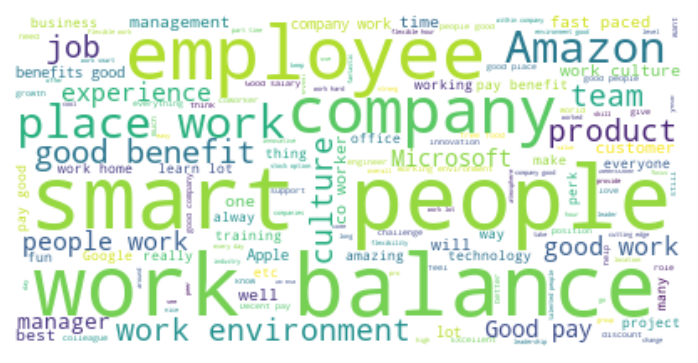

In [0]:
pros_text = " ".join(review for review in dataframe['pros'])
wordcloud = WordCloud(stopwords=stopwords_updated,background_color="white").generate(pros_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Conclusion
The data above reveals the following about pros of the company:

1) Work Balance was a positive. Since the frequency of 'work' and 'balance' is about equal, it is likely that they were used together in the same sentence. 

2) The people/employees are smart. This seems like common sense however it is clear that it is one of the positives people took away from working at these large companies. 

3) The product. Ultimately, the responses indicate former employees approved of and supported the products being delivered. 

The data above reveals the following about cons of the company:

1) Management. This was the most frequent response listed under cons. This indicates that employees probably left due to their disapproval of management and their practices. 

2) Work Balance. This was also listed as one of the pros in the company, however it was listed 3% more under cons. Clearly, many thought that the work balance was inefficient. 

3) Teams were an issue. At many of these large companies, employees are not allowed to select which team they want to work in. This is probably the third most common reason people left these companies. 
